In [106]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import matplotlib as mpl

# Customize font settings
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = ['Times New Roman']
# mpl.rcParams['text.usetex'] = True

with open("data.csv", "r") as f:
    data = np.array([eval('['+x.strip('\n')+']') for x in f.readlines()[1:]])

In [107]:
n = data[:,0]
k = data[:,1]
gamma0 = data[:,2]
gamma = data[:,3]

<IPython.core.display.Javascript object>


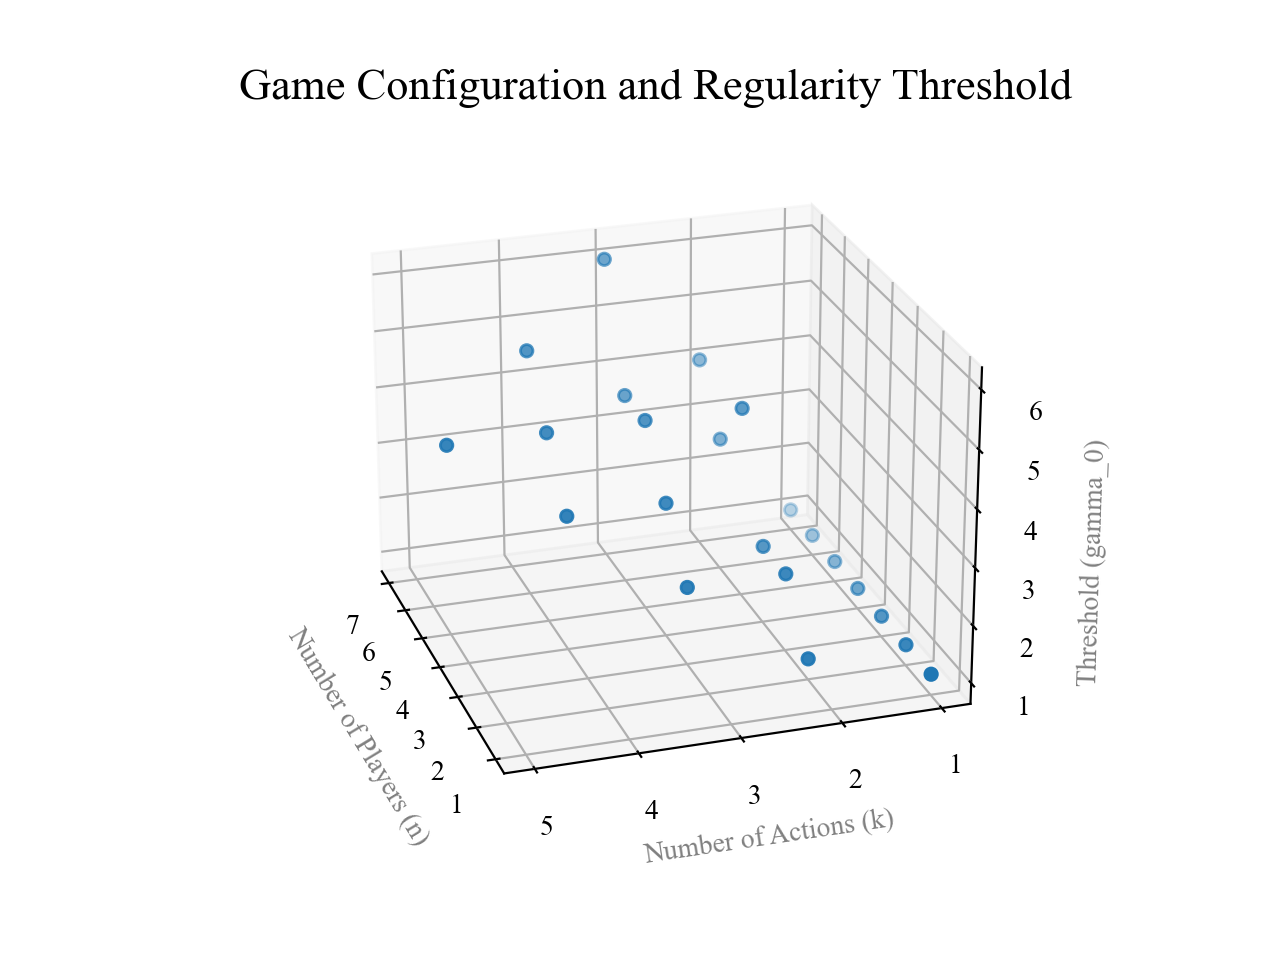

In [112]:
%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(n,k,gamma0)
ax.set_xlabel('Number of Players (n)', color='gray')
ax.set_ylabel('Number of Actions (k)', color='gray')
ax.set_zlabel('Threshold (gamma_0)', color='gray')
ax.set_title("Game Configuration and Regularity Threshold", size=16)

ax.view_init(elev=30, azim=0)  # Set initial view angle

plt.show()

<IPython.core.display.Javascript object>


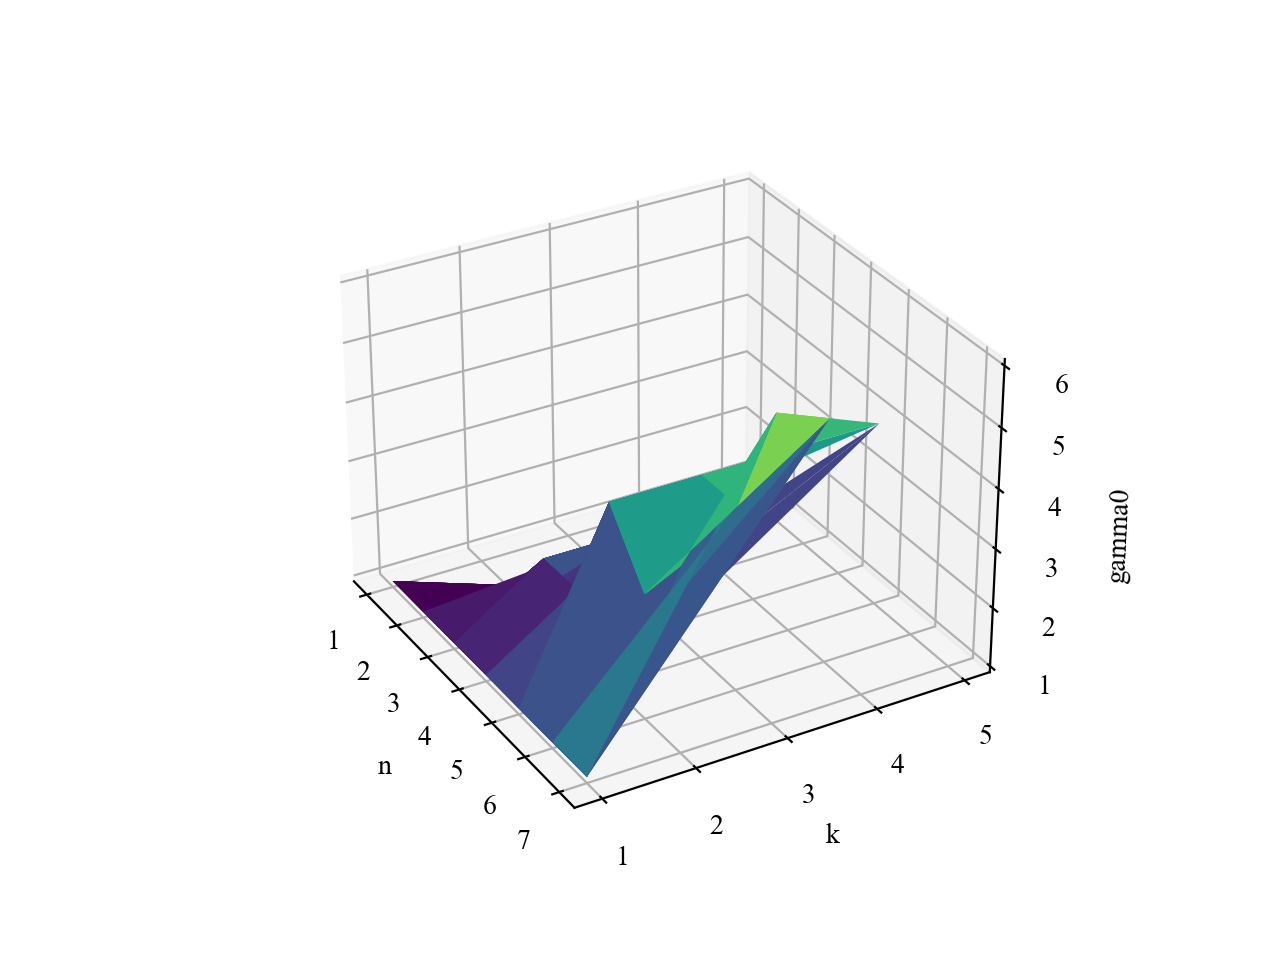

In [109]:
N, K = np.meshgrid(n, k)

# Perform interpolation
gamma0_2d = griddata((n, k), gamma0, (N, K), method='linear')

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the interpolated surface
ax.plot_surface(N, K, gamma0_2d, cmap='viridis')

ax.set_xlabel('n')
ax.set_ylabel('k')
ax.set_zlabel('gamma0')

ax.view_init(elev=30, azim=-30)  # Set initial view angle

plt.show()







In [110]:
def fixN(N, color='red'):
    idxs = np.where(n==N)
    plt.plot(k[idxs], gamma0[idxs], color=color, label=f"n={N}")
    
def plotAll():
    %matplotlib inline
    for x,c in zip(range(min(n), max(n)), ['red','green','blue','magenta','orange','gray','brown']):
        fixN(x,c)

    plt.legend()
    plt.xlabel("Number of Actions (k)", size=16)
    plt.ylabel("Threshold (gamma_0)", size=16)
    plt.title("Evolution of Threshold for Fixed Player Counts", size=16)
    
    plt.show()
    

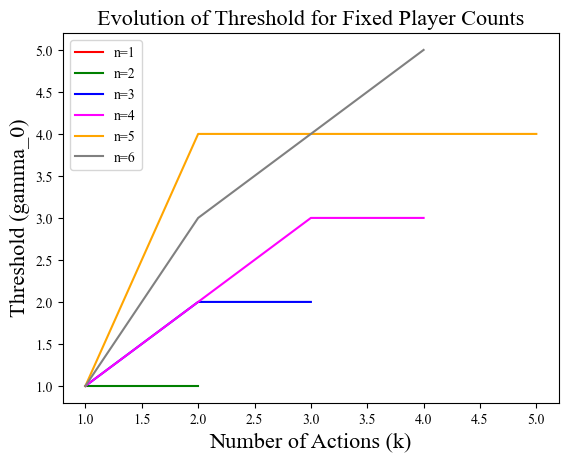

In [111]:
plotAll()